In [64]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
for dirname, _, filenames in os.walk("/Brain tumor Project/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/Brain tumor Project/input\Testing\glioma_tumor\image(1).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(10).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(100).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(11).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(12).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(13).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(14).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(15).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(16).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(17).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(18).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(19).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(2).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(20).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(21).jpg
/Brain tumor Project/input\Testing\glioma_tumor\image(22).jpg
/Brain tu

Number of train images 2870
Number of train images 2870


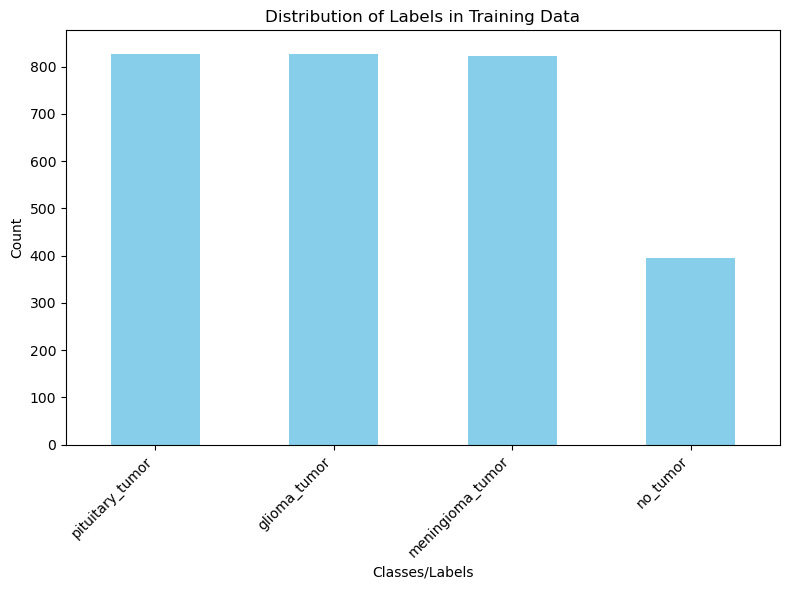

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt

train = []
label = []

for i in os.listdir(r"D:\Brain tumor Project\input\Training"):
    train_class = os.listdir(os.path.join(r"D:\Brain tumor Project\input\Training", i))
    for j in train_class:
        img = os.path.join('Training', i, j)
        train.append(img)
        label.append(i)

print(f"Number of train images {len(train)}")
print(f"Number of train images {len(label)}")

# Count occurrences of each label
label_counts = pd.Series(label).value_counts()

# Create a bar plot using matplotlib
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Classes/Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in Training Data')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Display the bar plot
plt.show()


In [40]:
no_of_images_in_class=[]
class_name=[]
for i in os.listdir(r"D:\Brain tumor Project\input\Training"):
  train_class=os.listdir(os.path.join(r"D:\Brain tumor Project\input\Training",i))
  no_of_images_in_class.append(len(train_class))
  class_name.append(i)
  print(f'no of image in {i} is {len(train_class)}')

no of image in glioma_tumor is 826
no of image in meningioma_tumor is 822
no of image in no_tumor is 395
no of image in pituitary_tumor is 827


In [41]:
tumor_df=pd.DataFrame({'Image':train,'Labels':label})
tumor_df

,Image,Labels
0,Training\glioma_tumor\gg (1).jpg,glioma_tumor
1,Training\glioma_tumor\gg (10).jpg,glioma_tumor
2,Training\glioma_tumor\gg (100).jpg,glioma_tumor
3,Training\glioma_tumor\gg (101).jpg,glioma_tumor
4,Training\glioma_tumor\gg (102).jpg,glioma_tumor
...,...,...
2865,Training\pituitary_tumor\p (95).jpg,pituitary_tumor
2866,Training\pituitary_tumor\p (96).jpg,pituitary_tumor
2867,Training\pituitary_tumor\p (97).jpg,pituitary_tumor
2868,Training\pituitary_tumor\p (98).jpg,pituitary_tumor


([<matplotlib.patches.Wedge at 0x22f98a3cac0>,
 [Text(0.680175652482535, 0.8645004810698245, 'glioma_tumor'),
  Text(-0.9982631765720512, 0.4620288197724011, 'meningioma_tumor'),
  Text(-0.68489709394512, -0.8607647592144613, 'no_tumor'),
  Text(0.6792288092406255, -0.8652446039690522, 'pituitary_tumor')],
 [Text(0.37100490135410996, 0.47154571694717695, '28.8%'),
  Text(-0.5445071872211188, 0.25201571987585514, '28.6%'),
  Text(-0.37358023306097454, -0.46950805048061517, '13.8%'),
  Text(0.3704884414039775, -0.47195160216493753, '28.8%')])

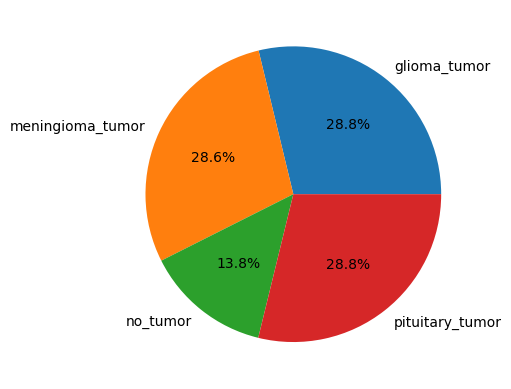

In [42]:
fig1,ax1=plt.subplots()
ax1.pie(no_of_images_in_class,labels=class_name,autopct='%1.1f%%')

In [11]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('./input/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('./input/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [12]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [14]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [18]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 124s 1s/step - loss: 1.6163 - accuracy: 0.2857 - val_loss: 1.3572 - val_accuracy: 0.2721
Epoch 2/20
83/83 [==============================] - 127s 2s/step - loss: 1.2545 - accuracy: 0.4098 - val_loss: 1.0838 - val_accuracy: 0.5442
Epoch 3/20
83/83 [==============================] - 132s 2s/step - loss: 0.9824 - accuracy: 0.5728 - val_loss: 0.9420 - val_accuracy: 0.5782
Epoch 4/20
83/83 [==============================] - 123s 1s/step - loss: 0.8393 - accuracy: 0.6345 - val_loss: 0.9646 - val_accuracy: 0.5340
Epoch 5/20
83/83 [==============================] - 121s 1s/step - loss: 0.7532 - accuracy: 0.6735 - val_loss: 0.7041 - val_accuracy: 0.6803
Epoch 6/20
83/83 [==============================] - 122s 1s/step - loss: 0.6312 - accuracy: 0.7374 - val_loss: 0.6556 - val_accuracy: 0.7245
Epoch 7/20
83/83 [==============================] - 123s 1s/step - loss: 0.5078 - accuracy: 0.7896 - val_loss: 0.5900 - val_accuracy: 0.7381
Epoch 8/20
83

In [24]:
model.save(filepath=r"D:\Brain tumor Project\model.h5",save_format='h5')

C:\Users\Priyadharshan\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
validation_accuracy = history.history['val_accuracy']
print(validation_accuracy[len(validation_accuracy)-1]*100)

89.79591727256775


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

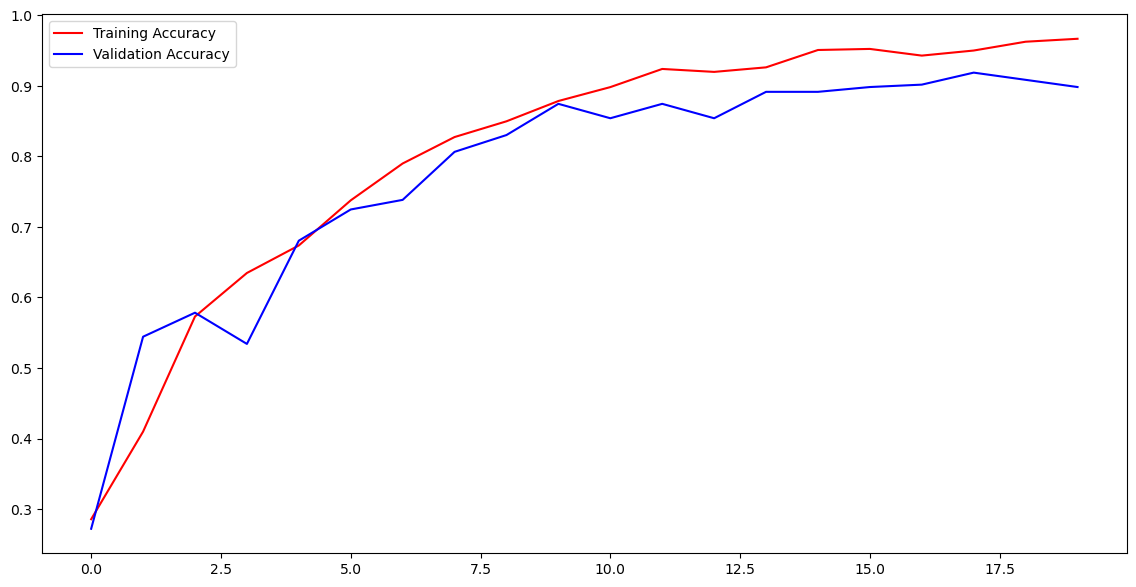

In [27]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

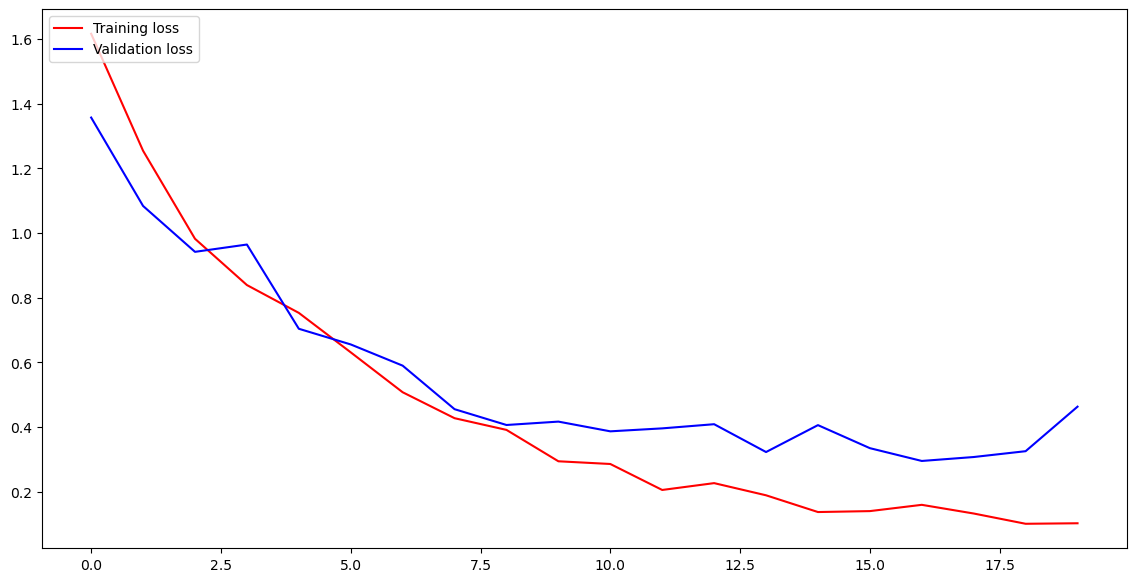

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [55]:
model.load_weights(filepath=r"D:\Brain tumor Project\model.h5")

In [60]:

img = cv2.imread("D:\Brain tumor Project\input\Training\pituitary_tumor\p (107).jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [61]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

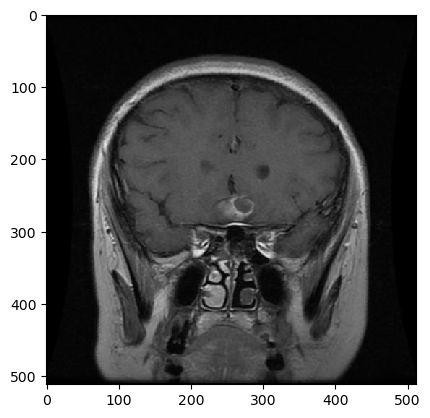

In [62]:
from tensorflow.keras.preprocessing import image
img = image.load_img("D:\Brain tumor Project\input\Training\pituitary_tumor\p (107).jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [81]:
a=model.predict(img_array)
indices = a.argmax()
indices
labels[indices]

1/1 [==============================] - 0s 40ms/step


'pituitary_tumor'